In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# select model
paper1_results = pd.read_csv('../data/results/paper1_model_metrics.csv')
# paper2_results = pd.read_csv('data/results/paper2_model_metrics.csv')
# paper3_results = pd.read_csv('data/results/paper3_model_metrics.csv')
# paper4_results = pd.read_csv('data/results/paper4_model_metrics.csv')
# dnn_results = pd.read_csv('data/results/dnn_model_metrics.csv')

In [5]:
# Combine all results
# all_results = pd.concat([paper1_results, paper2_results, paper3_results, paper4_results, dnn_results])
all_results = paper1_results  # Using only paper1 for now

In [6]:
def analyze_results(results):
    print(f"Available models: {results['model_name'].unique()}")
    print(f"Available scenarios: {results['scenario_id'].unique()}")
    print("\nSummary statistics:")
    
    # Group by model and calculate averages
    model_summary = results.groupby('model_name').agg({
        'success_rate': 'mean',
        'avg_energy': 'mean',
        'avg_delay': 'mean',
        'energy_efficiency': 'mean',
        'load_balance': 'mean',
        'combined_metric': 'mean'
    }).reset_index()
    
    display(model_summary)
    return model_summary

model_summary = analyze_results(all_results)



Available models: ['LyapunovModel']
Available scenarios: ['scenario_10v_5r_26t_t4' 'scenario_10v_5r_26t_t3' 'scenario_20v_10r_50t'
 'scenario_10v_5r_26t_t2' 'scenario_10v_5r_26t_t5' 'scenario_10v_5r_26t'
 'scenario_10v_5r_26t_t10' 'scenario_10v_5r_26t_t7'
 'scenario_10v_5r_26t_t9' 'scenario_10v_5r_26t_t8'
 'scenario_10v_5r_26t_t6' 'scenario_10v_5r_26t_t1']

Summary statistics:


,model_name,success_rate,avg_energy,avg_delay,energy_efficiency,load_balance,combined_metric
0,LyapunovModel,0.759722,0.887647,186.928701,9.728038e-08,1.0,0.503889


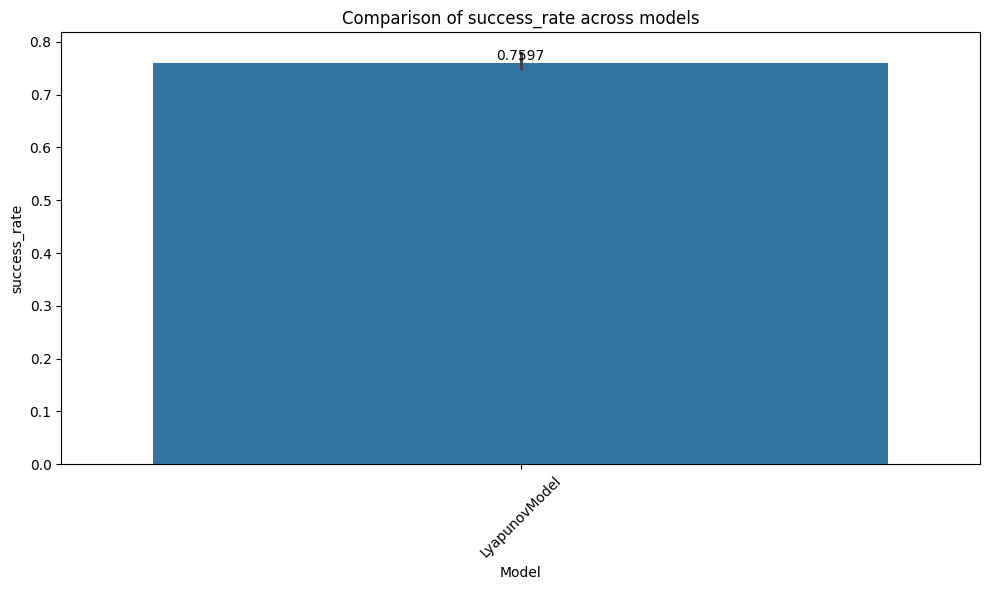

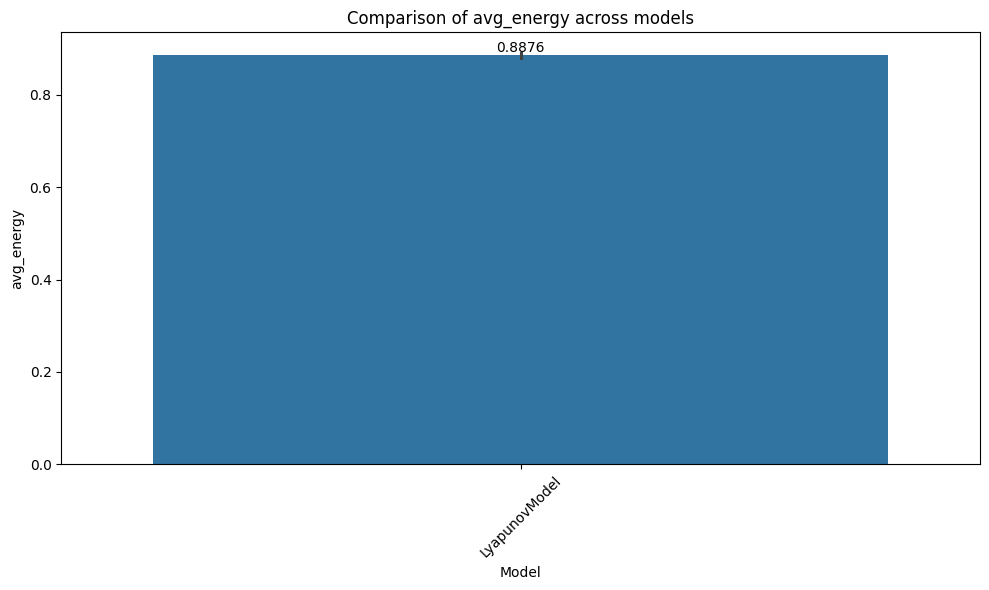

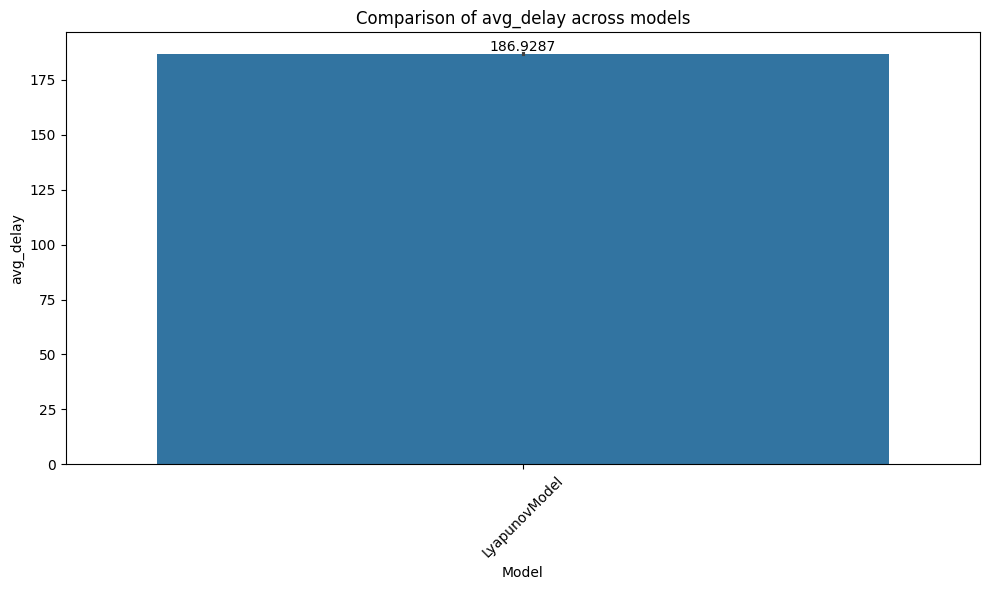

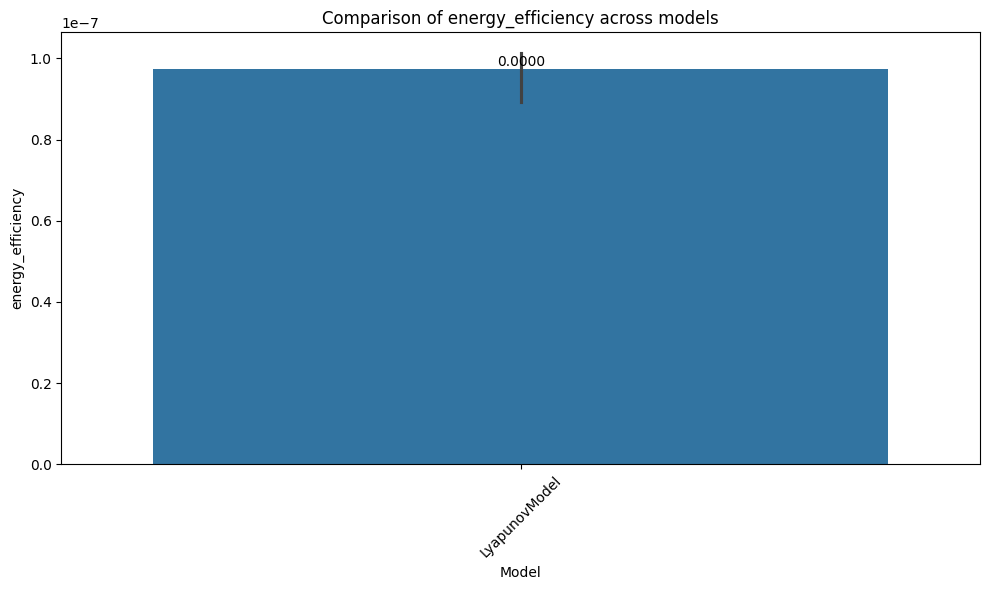

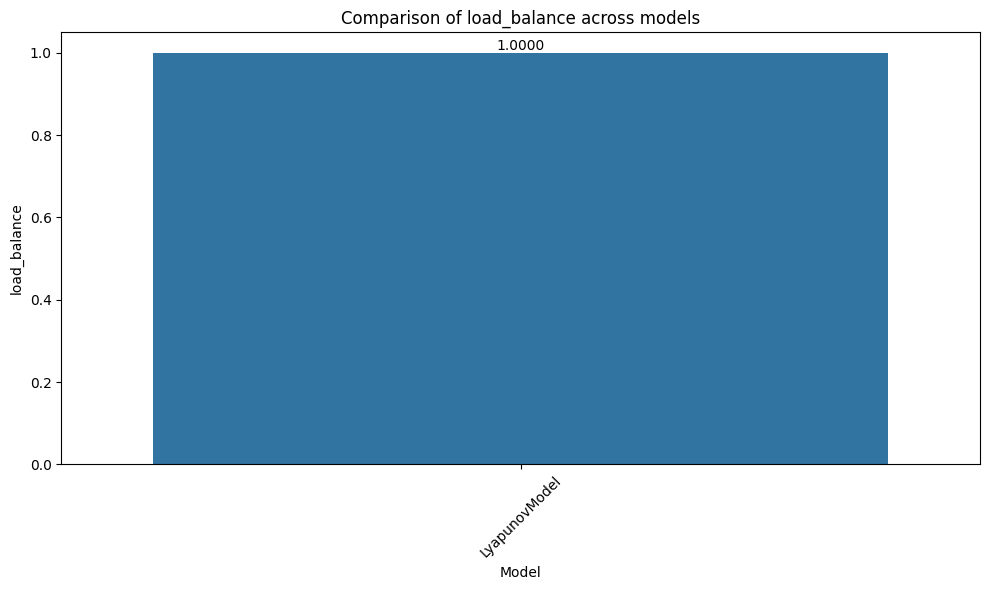

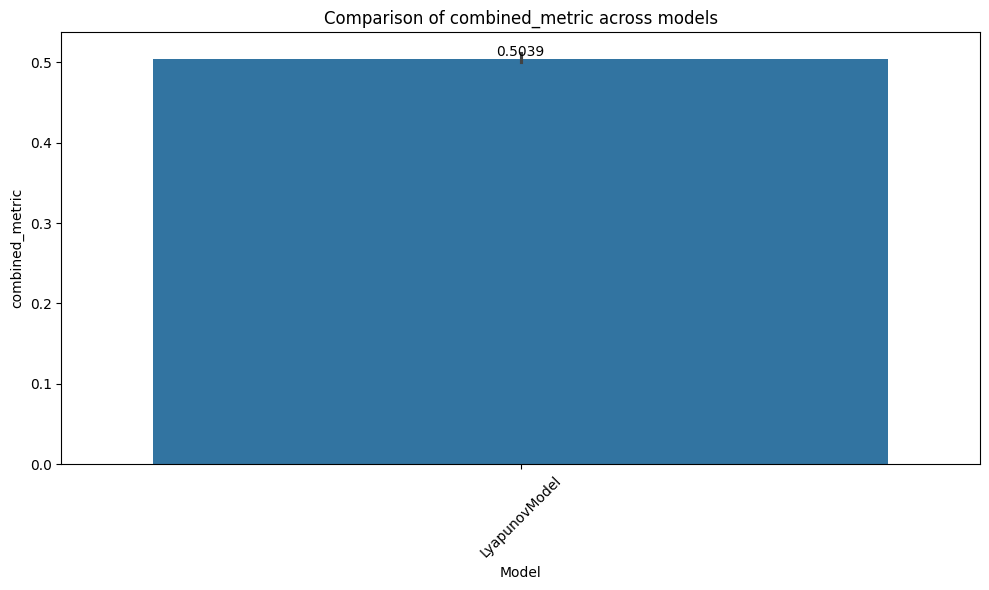

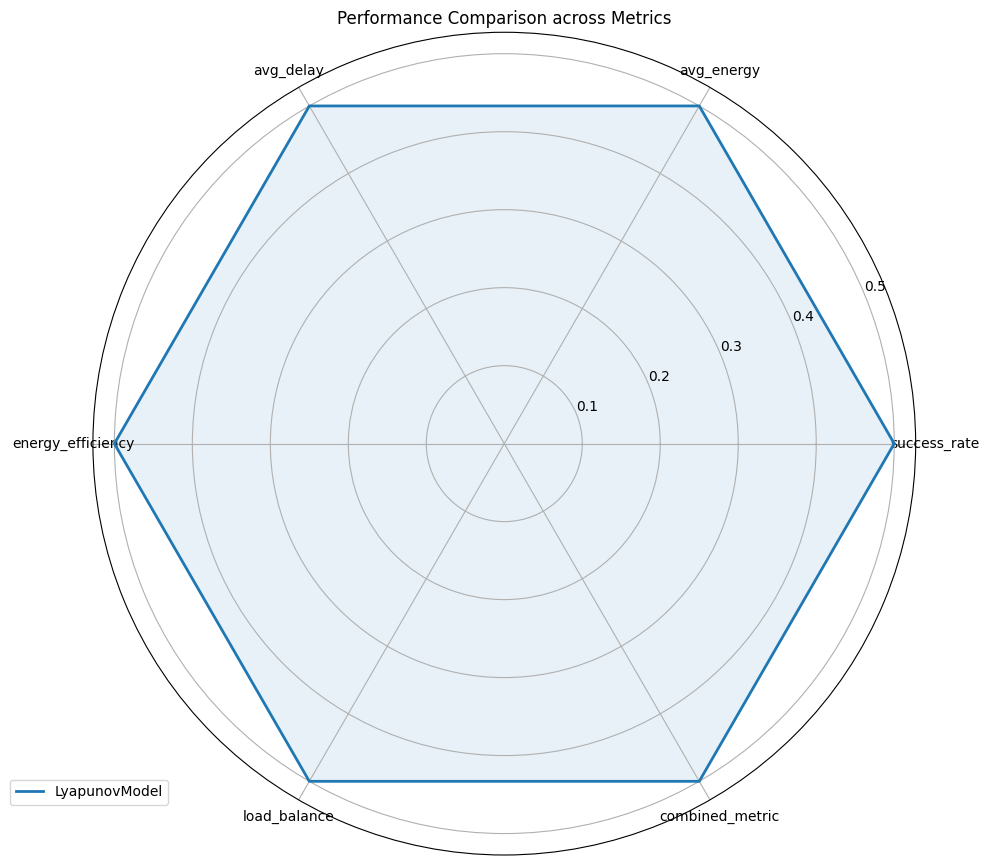

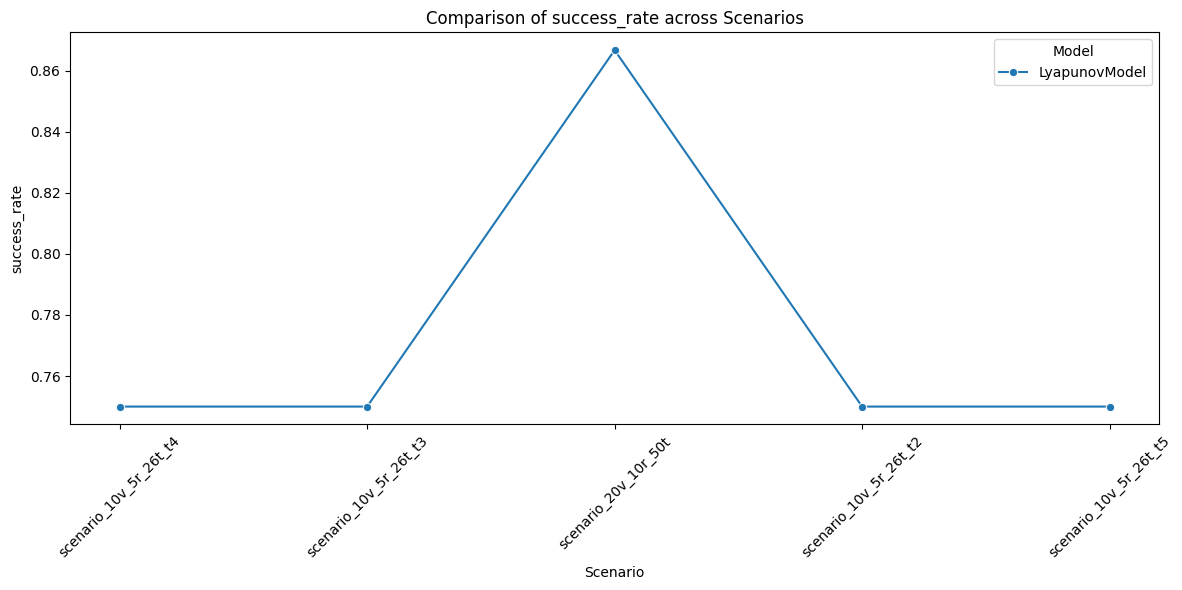

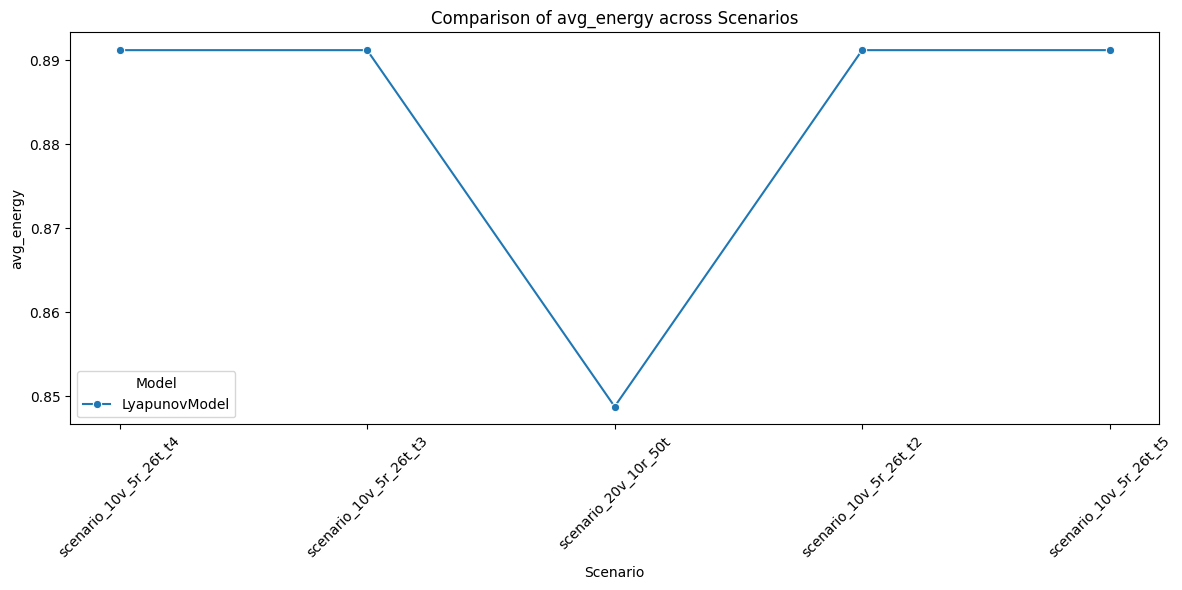

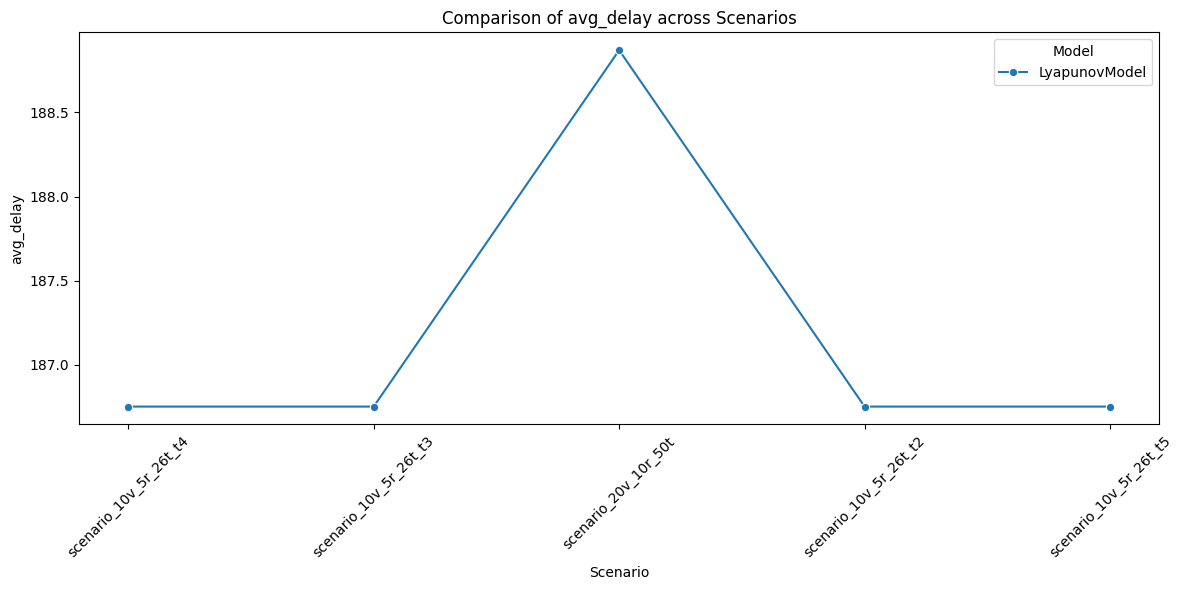

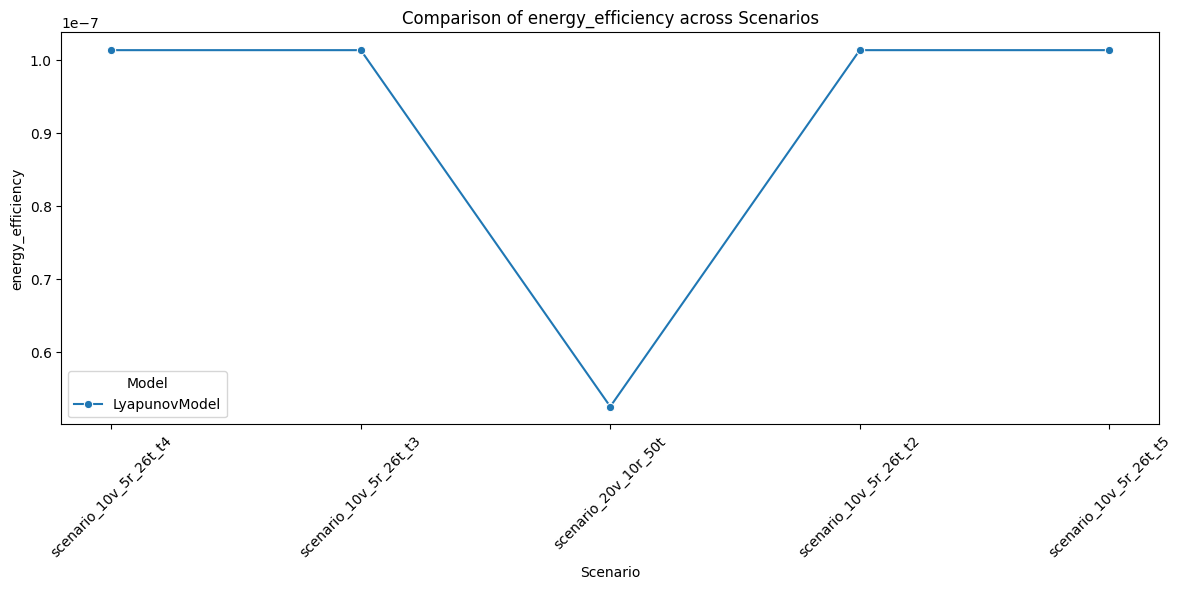

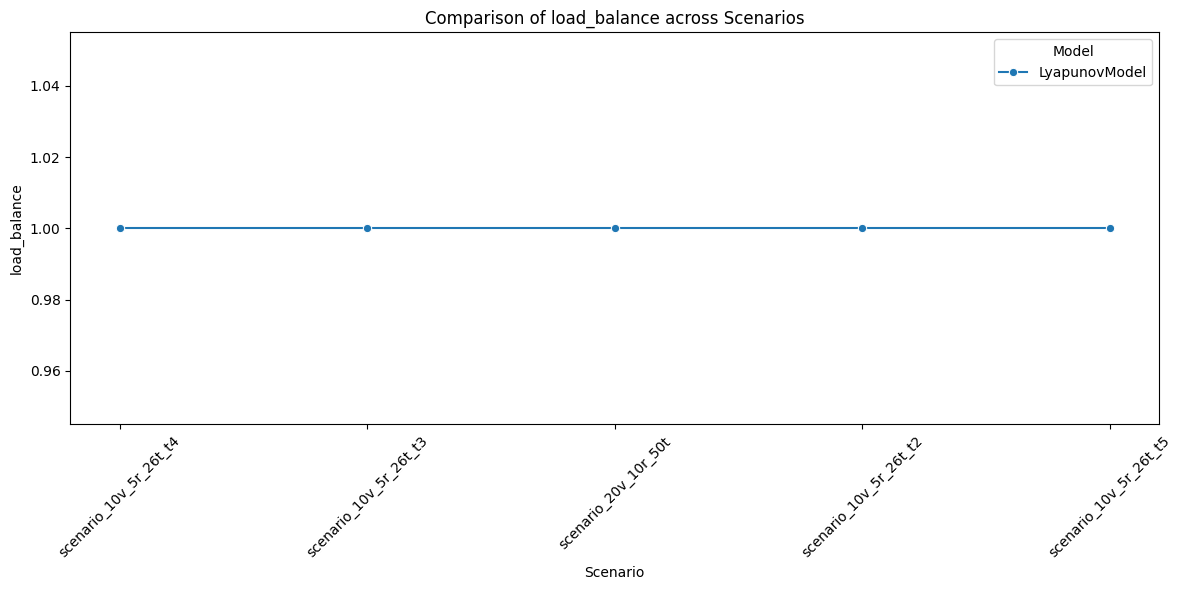

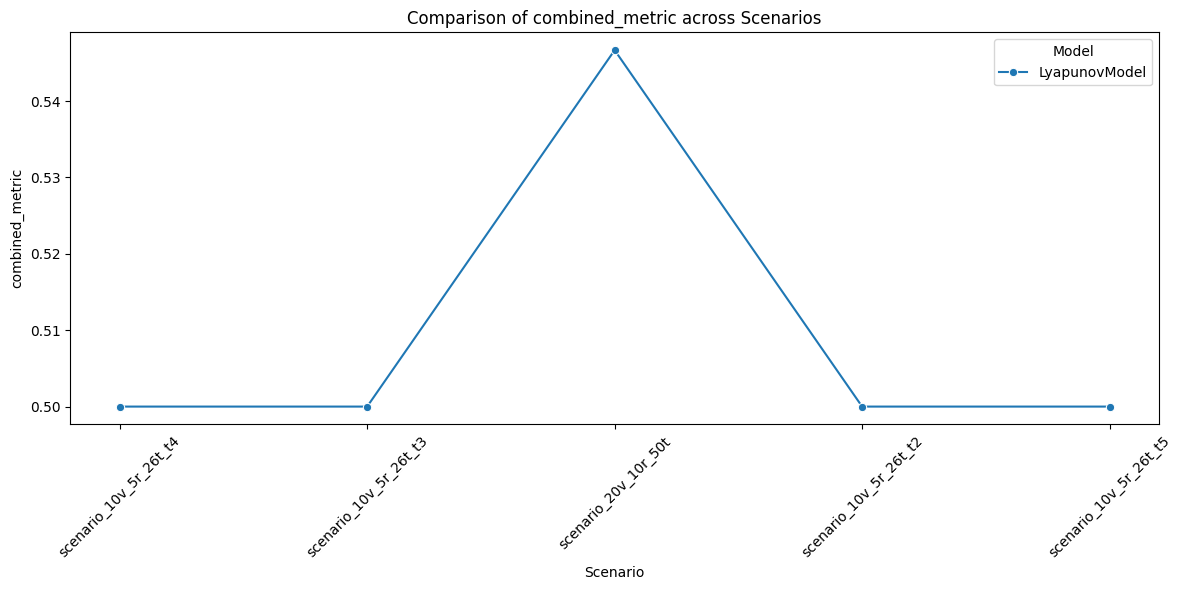

In [7]:

def plot_metric_comparison(results, metric, title=None, scenarios=None):
    """Plot comparison of a metric across different models and scenarios"""
    if scenarios:
        filtered_results = results[results['scenario_id'].isin(scenarios)]
    else:
        filtered_results = results
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=filtered_results, x='model_name', y=metric)
    
    if title:
        plt.title(title)
    else:
        plt.title(f'Comparison of {metric} across models')
    
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    
    # Add value labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

def plot_metrics_radar(summary_df, metrics=None):
    """Plot a radar chart to compare models across multiple metrics"""
    if metrics is None:
        metrics = ['success_rate', 'avg_energy', 'avg_delay', 
                  'energy_efficiency', 'load_balance', 'combined_metric']
    
    # Number of metrics
    N = len(metrics)
    
    # Create a figure
    fig = plt.figure(figsize=(10, 10))
    
    # Create angles for each metric
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Create axis
    ax = plt.subplot(111, polar=True)
    
    # Add each model
    for i, model in enumerate(summary_df['model_name']):
        values = summary_df.loc[i, metrics].values.flatten().tolist()
        
        # Normalize values to scale of 0-1 for better visualization
        min_vals = summary_df[metrics].min()
        max_vals = summary_df[metrics].max()
        normalized_values = [(val - min_val) / (max_val - min_val) if max_val > min_val else 0.5 
                            for val, min_val, max_val in zip(values, min_vals, max_vals)]
        
        # Close the loop
        normalized_values += normalized_values[:1]
        
        # Plot the values
        ax.plot(angles, normalized_values, linewidth=2, linestyle='solid', label=model)
        ax.fill(angles, normalized_values, alpha=0.1)
    
    # Set the labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    plt.title('Performance Comparison across Metrics')
    plt.tight_layout()
    plt.show()

def plot_scenario_comparison(results, metric):
    """Plot comparison of a metric across different scenarios for each model"""
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=results, x='scenario_id', y=metric, hue='model_name', marker='o')
    plt.title(f'Comparison of {metric} across Scenarios')
    plt.ylabel(metric)
    plt.xlabel('Scenario')
    plt.xticks(rotation=45)
    plt.legend(title='Model')
    plt.tight_layout()
    plt.show()

# Plot various metrics
metrics_to_plot = ['success_rate', 'avg_energy', 'avg_delay', 'energy_efficiency', 'load_balance', 'combined_metric']

for metric in metrics_to_plot:
    plot_metric_comparison(all_results, metric)

# Plot radar chart for model comparison
plot_metrics_radar(model_summary)

# Compare scenarios
unique_scenarios = all_results['scenario_id'].unique()
scenario_subset = unique_scenarios[:5]  # Take first 5 scenarios for clarity
for metric in metrics_to_plot:
    plot_scenario_comparison(all_results[all_results['scenario_id'].isin(scenario_subset)], metric)



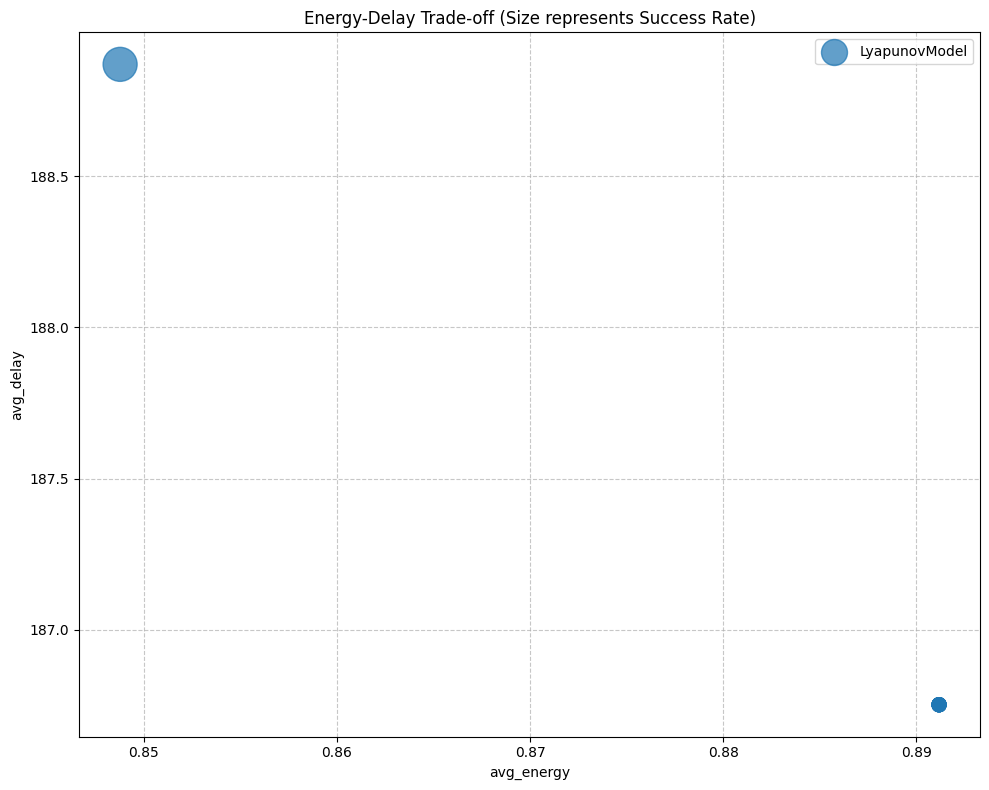

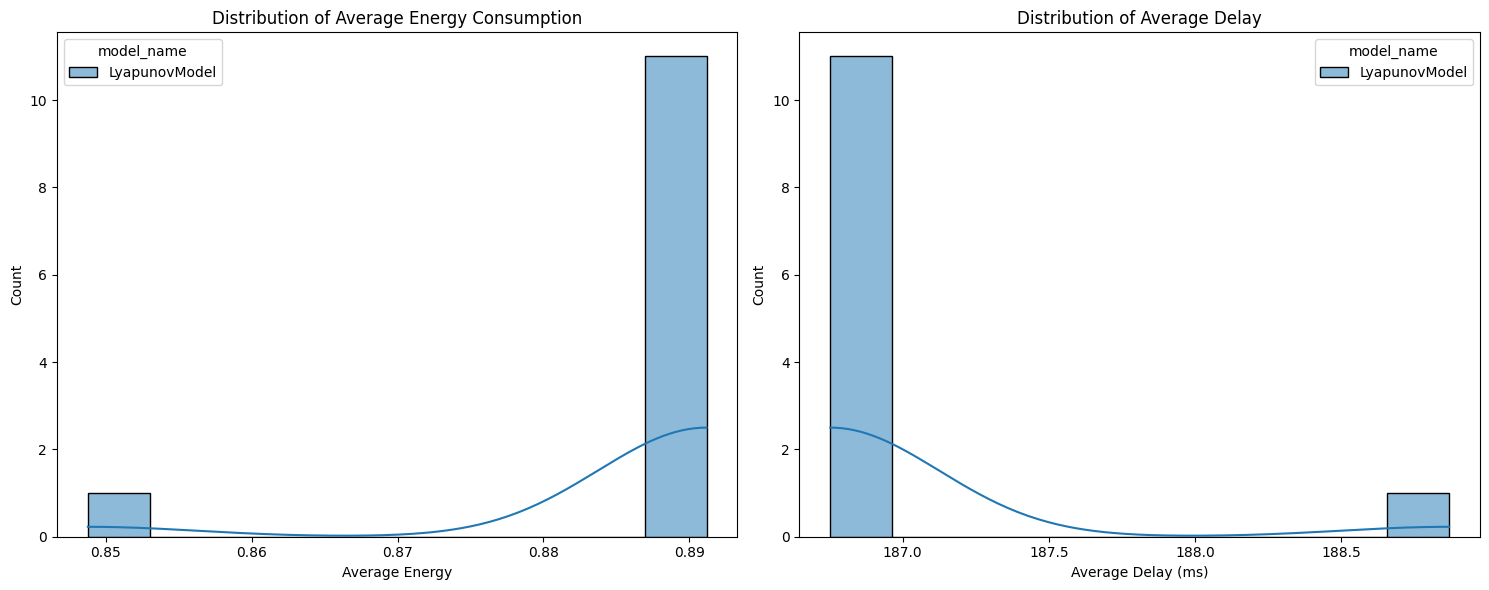

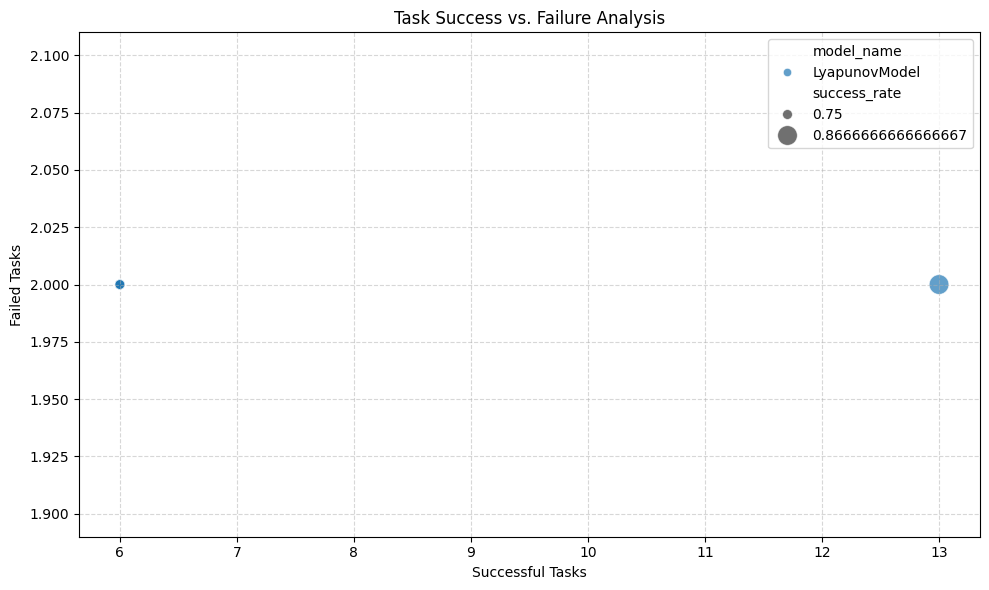

In [8]:
# Advanced visualization: multi-metric comparison
def plot_multi_metric(results, x_metric, y_metric, size_metric, title):
    plt.figure(figsize=(10, 8))
    
    # Get unique models and assign colors
    models = results['model_name'].unique()
    colors = plt.cm.tab10(np.linspace(0, 1, len(models)))
    
    for i, model in enumerate(models):
        model_data = results[results['model_name'] == model]
        
        # Normalize size metric for better visualization
        size_values = model_data[size_metric].values
        normalized_sizes = 100 + (size_values - size_values.min()) / (size_values.max() - size_values.min()) * 500
        
        plt.scatter(
            model_data[x_metric], 
            model_data[y_metric], 
            s=normalized_sizes,
            c=[colors[i]],
            alpha=0.7,
            label=model
        )
    
    plt.xlabel(x_metric)
    plt.ylabel(y_metric)
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot multi-metric comparison
plot_multi_metric(
    all_results,
    'avg_energy',
    'avg_delay',
    'success_rate',
    'Energy-Delay Trade-off (Size represents Success Rate)'
)

# Energy and delay distribution
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(all_results, x='avg_energy', hue='model_name', kde=True, bins=10)
plt.title('Distribution of Average Energy Consumption')
plt.xlabel('Average Energy')

plt.subplot(1, 2, 2)
sns.histplot(all_results, x='avg_delay', hue='model_name', kde=True, bins=10)
plt.title('Distribution of Average Delay')
plt.xlabel('Average Delay (ms)')

plt.tight_layout()
plt.show()

# Task success analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=all_results,
    x='successful_tasks',
    y='failed_tasks',
    hue='model_name',
    size='success_rate',
    sizes=(50, 200),
    alpha=0.7
)
plt.title('Task Success vs. Failure Analysis')
plt.xlabel('Successful Tasks')
plt.ylabel('Failed Tasks')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()